In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("titanic.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
x=df.drop('Survived',axis='columns')
y=df.Survived

In [ ]:
dummies =pd.get_dummies(x.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
x=pd.concat([x,dummies],axis='columns')
x.head(5)

,Pclass,Sex,Age,female,male
0,3,male,22.0,0,1
1,1,female,38.0,1,0
2,3,female,26.0,1,0
3,1,female,35.0,1,0
4,3,male,35.0,0,1


In [ ]:
x.drop(['Sex','male'],axis='columns',inplace=True)
x.head(5)

,Pclass,Age,female
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


In [ ]:
x.columns[x.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
x.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
x.Age=x.Age.fillna(x.Age.mean())
x.head()

,Pclass,Age,female
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_test,y_test)

0.7873134328358209

In [ ]:
x_test[0:20]

,Pclass,Age,female
666,2,25.000000,0
525,3,40.500000,0
556,1,48.000000,1
178,2,30.000000,0
404,3,20.000000,1
880,2,25.000000,1
809,1,33.000000,1
384,3,29.699118,0
291,1,19.000000,1
407,2,3.000000,0


In [ ]:
y_test[0:20]

666    0
525    0
556    1
178    0
404    0
880    1
809    1
384    0
291    1
407    1
265    0
390    1
464    0
115    0
110    0
599    1
779    1
308    0
275    1
727    1
Name: Survived, dtype: int64

In [ ]:
predict=model.predict(x_test[0:20])

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
model.predict_proba(x_test[:20])

array([[0.84412445, 0.15587555],
       [0.92651191, 0.07348809],
       [0.04835618, 0.95164382],
       [0.85445539, 0.14554461],
       [0.22309579, 0.77690421],
       [0.13726499, 0.86273501],
       [0.04938896, 0.95061104],
       [0.92209817, 0.07790183],
       [0.03871934, 0.96128066],
       [0.71732439, 0.28267561],
       [0.86082012, 0.13917988],
       [0.64337067, 0.35662933],
       [0.92209817, 0.07790183],
       [0.90932006, 0.09067994],
       [0.63617794, 0.36382206],
       [0.63076721, 0.36923279],
       [0.05029297, 0.94970703],
       [0.85445539, 0.14554461],
       [0.03533401, 0.96466599],
       [0.25802979, 0.74197021]])

In [ ]:
y_pred_nb = model.predict(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),x_train,y_train,cv=10)

array([0.77777778, 0.79365079, 0.77777778, 0.80645161, 0.82258065,
       0.83870968, 0.74193548, 0.72580645, 0.82258065, 0.75806452])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)

Confusion Matrix for Naive Bayes:
 [[142  24]
 [ 33  69]]


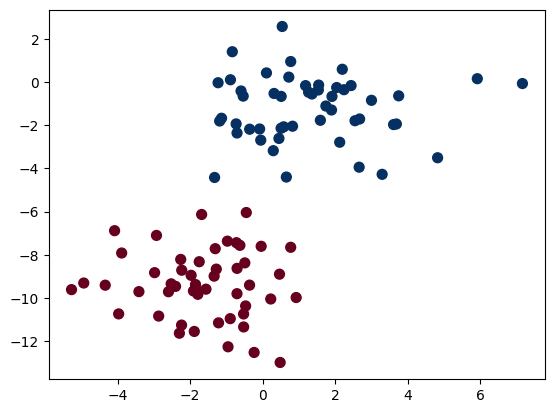

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');